In [1]:
import pandas as pd
import numpy as np
from circuit_reader import *

In [2]:
# Original simulation
cd = CircuitData()
cd.filename = "examples/IndCancel_voltage_source_rout_bfebest"
cd.read_results()

In [3]:
cd.data  # time domain data

,time,i(l2),i(la),i(lb),v(0)-v(6),v(0)-v(7),v(1)-v(0),v(2)-v(1),v(3)-v(0),v(4)-v(3),v(6)-v(2),v(101)
0,0.000000e+00,-3.437530e-06,4.707001e-07,-2.715768e-07,-2.341985e-02,1.357884e-05,-9.474289e-17,-3.511802e-02,3.427111e-01,1.358277e-05,5.853787e-02,-0.000124
1,1.000000e-11,3.195725e-07,-3.845278e-08,-6.581612e-09,-7.890765e-05,3.290806e-07,-3.141587e-13,-1.180765e-04,1.152822e-03,-1.153206e-03,1.969841e-04,-3.435204
2,2.000000e-11,-2.067476e-06,2.819688e-07,-1.565589e-07,1.287425e-06,7.827945e-06,-6.283144e-13,8.710336e-06,-7.028704e-05,7.031062e-05,-9.997760e-06,-1.251853
3,3.000000e-11,-5.419521e-07,7.795572e-08,-6.528848e-08,-2.819053e-05,3.264424e-06,-9.424638e-13,-3.945872e-05,3.911768e-04,-3.913068e-04,6.764924e-05,-2.647420
4,4.000000e-11,-3.181603e-07,3.913777e-08,1.424225e-09,1.540195e-05,-7.121126e-08,-1.256604e-12,2.304125e-05,-2.249729e-04,2.250477e-04,-3.844319e-05,-2.849543
...,...,...,...,...,...,...,...,...,...,...,...,...
119996,1.199960e-06,-2.405870e-08,2.975313e-09,1.282180e-11,1.118998e-09,-6.410900e-10,1.256604e-12,1.123297e-09,-1.217002e-08,1.217404e-08,-2.243552e-09,-3.119519
119997,1.199970e-06,-2.365021e-08,2.924715e-09,1.316487e-11,1.149349e-09,-6.582433e-10,9.424638e-13,1.153968e-09,-1.250051e-08,1.250466e-08,-2.304259e-09,-3.119894
119998,1.199980e-06,-2.323036e-08,2.872703e-09,1.353376e-11,1.182000e-09,-6.766881e-10,6.283144e-13,1.186970e-09,-1.285619e-08,1.286044e-08,-2.369598e-09,-3.120280
119999,1.199990e-06,-2.279827e-08,2.819169e-09,1.393101e-11,1.217173e-09,-6.965506e-10,3.141587e-13,1.222530e-09,-1.323949e-08,1.324387e-08,-2.440017e-09,-3.120676


In [4]:
# Cuts a single cycle slice of data
idx_start = 21000
idx_stop = 23000  # 1 cycle: 2000 points (500 MHz)

In [5]:
time_array = cd.data["time"].to_numpy()
voltage_input = cd.data["v(1)-v(0)"].to_numpy()
voltage_output = cd.data["v(0)-v(7)"].to_numpy()
voltage_geometric = cd.data["v(0)-v(6)"].to_numpy() + cd.data["v(2)-v(1)"].to_numpy()  # both of these
voltage_cancel = cd.data["v(6)-v(2)"].to_numpy()
voltage_jj = cd.data["v(3)-v(0)"].to_numpy()  # Josephson junction

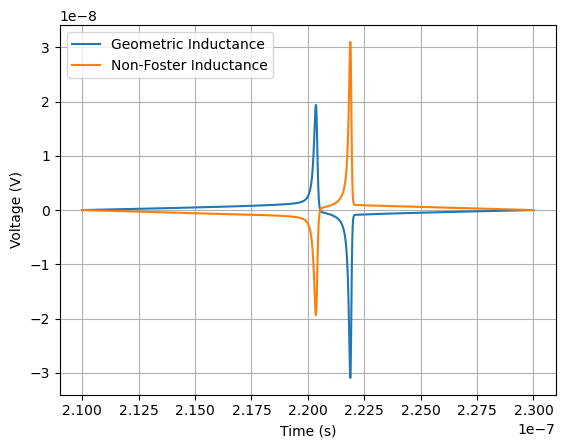

In [6]:
# plt.plot(time_array[idx_start:idx_stop], voltage_input[idx_start:idx_stop], label="Input")  # choose what to plot
# plt.plot(time_array[idx_start:idx_stop], voltage_input[idx_start:idx_stop]*100, label="Input, 100x AMPLIFIED")  # to see structure better
plt.plot(time_array[idx_start:idx_stop], voltage_geometric[idx_start:idx_stop], label="Geometric Inductance")
plt.plot(time_array[idx_start:idx_stop], voltage_cancel[idx_start:idx_stop], label="Non-Foster Inductance")
# plt.plot(time_array[idx_start:idx_stop], voltage_jj[idx_start:idx_stop], label="Across Josephson junction")
# plt.plot(time_array[idx_start:idx_stop], voltage_output[idx_start:idx_stop], label="Output")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid()
plt.legend()
plt.show()

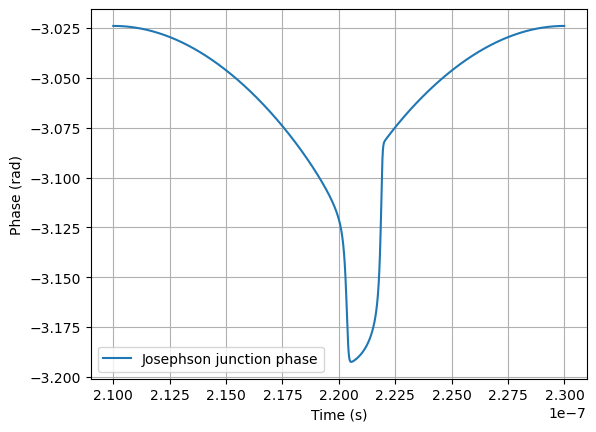

In [7]:
phase_jj = cd.data["v(101)"].to_numpy()  # JJ phase
plt.plot(time_array[idx_start:idx_stop], phase_jj[idx_start:idx_stop], label="Josephson junction phase")
plt.xlabel("Time (s)")
plt.ylabel("Phase (rad)")
plt.grid()
plt.legend()
plt.show()

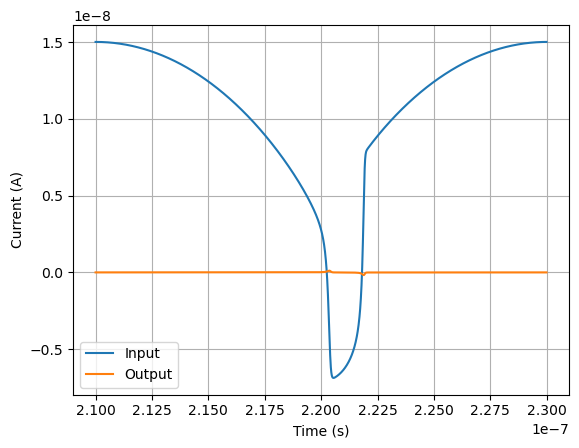

In [8]:
current_input = cd.data["i(la)"].to_numpy()
current_output = cd.data["i(lb)"].to_numpy()
current_jj = cd.data["i(l2)"].to_numpy()
plt.plot(time_array[idx_start:idx_stop], current_input[idx_start:idx_stop], label="Input")
plt.plot(time_array[idx_start:idx_stop], current_output[idx_start:idx_stop], label="Output")
# plt.plot(time_array[idx_start:idx_stop], current_output[idx_start:idx_stop]*100, label="Output, 100x AMPLIFIED")  # to see structure better
# plt.plot(time_array[idx_start:idx_stop], current_jj[idx_start:idx_stop], label="Josephson junction")
# plt.plot([time_array[idx_start], time_array[idx_stop]], [1.09e-6, 1.09e-6], "k--", label="Critical current (top)")
# plt.plot([time_array[idx_start], time_array[idx_stop]], [-1.09e-6, -1.09e-6], "k--", label="Critical current (bottom)")
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.grid()
plt.legend()
plt.show()

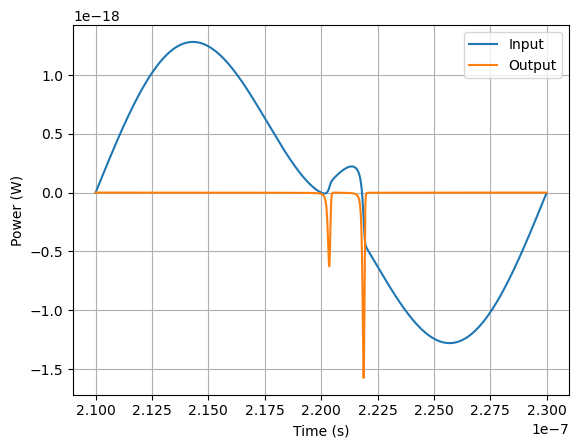

In [9]:
power_input = current_input * voltage_input
power_output = current_output * voltage_output
plt.plot(time_array[idx_start:idx_stop], power_input[idx_start:idx_stop], label="Input")
plt.plot(time_array[idx_start:idx_stop], power_output[idx_start:idx_stop], label="Output")
plt.xlabel("Time (s)")
plt.ylabel("Power (W)")
plt.grid()
plt.legend()
plt.show()

In [10]:
def do_fft(time_, data, round_stepsize=True):
    stepsize = time_[1] - time_[0]  # higher maxfreq when data is finer
    # duration = time_[-1] - time_[0]  # better rbw when data is longer
    if round_stepsize:  # only works when stepsize is 10^n
        round_digit = round(-np.log10(time_[1]-time_[0]))
        stepsize = round(stepsize, round_digit)
    npts = len(time_)  # round(duration/stepsize)+1  # must be integer
    
    yf = np.abs(fft(data)[0:npts//2])  # fftshift(fft(y))
    if npts % 2 == 0: xf = fftfreq(npts, stepsize)[0:npts//2]  # why do i need to do this separately???
    else: xf = fftfreq(npts-1, stepsize)[0:npts//2]

    return xf, yf

In [11]:
idx = 20000  # makes rbw clean (indices 20000-120000 only)
freq_input_fft, power_input_fft = do_fft(time_array[idx:], power_input[idx:])
freq_output_fft, power_output_fft = do_fft(time_array[idx:], power_output[idx:])

In [12]:
# Looking at all powers across frequencies, levels are very similar
print(np.sum(power_input_fft), np.sum(power_output_fft))

1.1151639774504404e-13 1.0899122370271357e-13


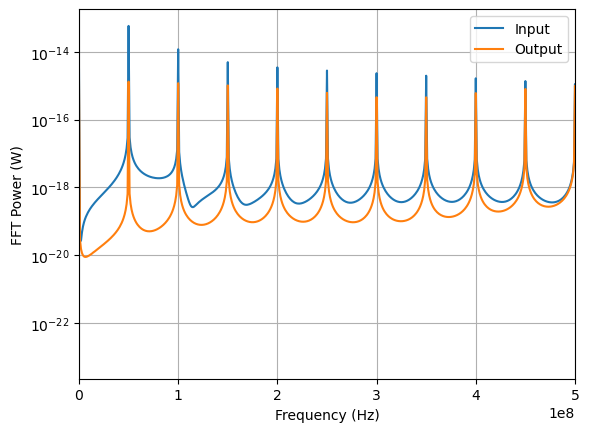

In [13]:
plt.plot(freq_input_fft, power_input_fft, label="Input")  # I think actual fft values need to be divided by npts?
plt.plot(freq_output_fft, power_output_fft, label="Output")
plt.yscale("log")
plt.xlim(0, 5e8)
plt.xlabel("Frequency (Hz)")
plt.ylabel("FFT Power (W)")
plt.grid()
plt.legend()
plt.show()

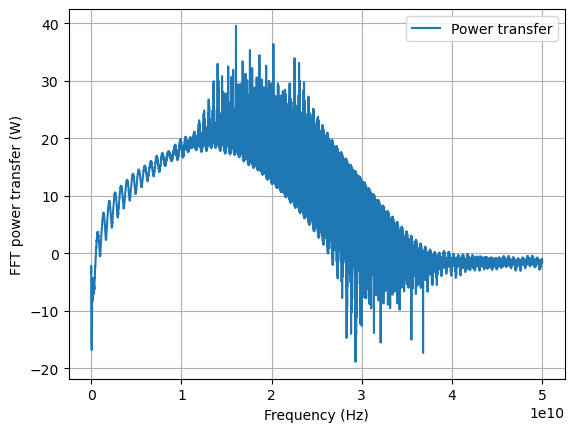

In [14]:
# Miscellaneous: "transfer function"
plt.plot(freq_input_fft, power2dB(power_output_fft/power_input_fft), label="Power transfer")
# plt.xlim(0, 5e8)
plt.xlabel("Frequency (Hz)")
plt.ylabel("FFT power transfer (W)")
plt.grid()
plt.legend()
plt.show()

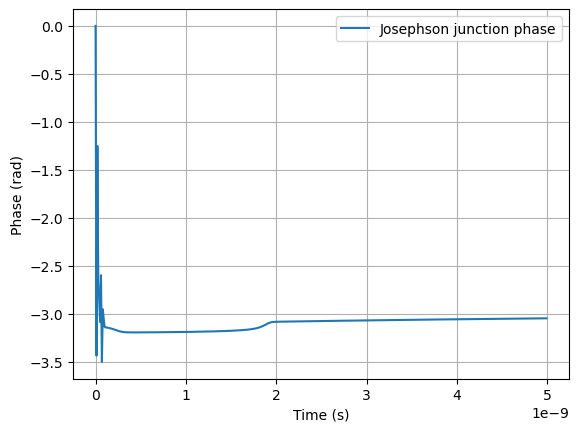

In [15]:
# Miscellaneous: Initial behavior
idx_ringing = 500
plt.plot(time_array[:idx_ringing], phase_jj[:idx_ringing], label="Josephson junction phase")
plt.xlabel("Time (s)")
plt.ylabel("Phase (rad)")
plt.grid()
plt.legend()
plt.show()

In [16]:
# Step function voltage, with junction
cd = CircuitData()
cd.filename = "examples/IndCancel_pulsed_1e-15"
cd.read_results()

In [17]:
time_array = cd.data["time"].to_numpy()
voltage_input = cd.data["v(1)-v(0)"].to_numpy()
voltage_output = cd.data["v(0)-v(7)"].to_numpy()
voltage_geometric = cd.data["v(0)-v(6)"].to_numpy() + cd.data["v(2)-v(1)"].to_numpy()  # both of these
voltage_cancel = cd.data["v(6)-v(2)"].to_numpy()
voltage_jj = cd.data["v(3)-v(0)"].to_numpy()  # Josephson junction

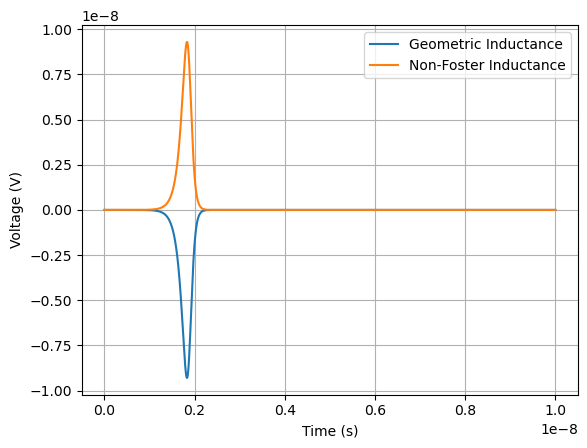

In [18]:
# full thing
plt.plot(time_array, voltage_geometric, label="Geometric Inductance")
plt.plot(time_array, voltage_cancel, label="Non-Foster Inductance")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid()
plt.legend()
plt.show()

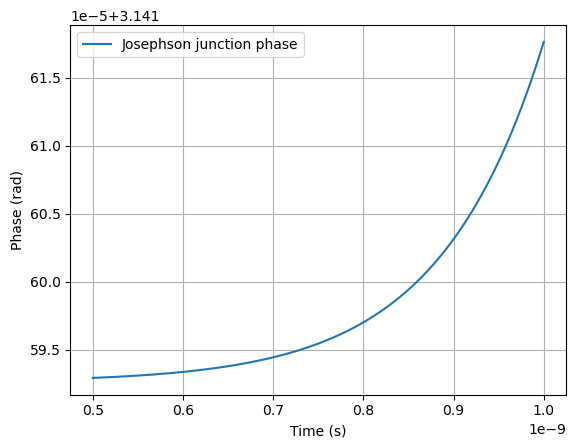

In [19]:
# When it goes up
idx_start = 5000
idx_stop = 10000  
phase_jj = cd.data["v(101)"].to_numpy()  # JJ phase
plt.plot(time_array[idx_start:idx_stop], phase_jj[idx_start:idx_stop], label="Josephson junction phase")
plt.xlabel("Time (s)")
plt.ylabel("Phase (rad)")
plt.grid()
plt.legend()
plt.show()

[[Model]]
    Model(exp_decay_alt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 5000
    # variables        = 3
    chi-square         = 1.2939e-07
    reduced chi-square = 2.5893e-11
    Akaike info crit   = -121882.294
    Bayesian info crit = -121862.742
    R-squared          = 0.99999998
[[Variables]]
    a: -8.61688465 +/- 4.7409e-05 (0.00%) (init = -8.6)
    b:  1.23559401 +/- 1.4055e-06 (0.00%) (init = 1.24)
    c: -1.3487e-04 +/- 1.6503e-07 (0.12%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = +0.9838
    C(a, c) = -0.8081
    C(b, c) = -0.7239


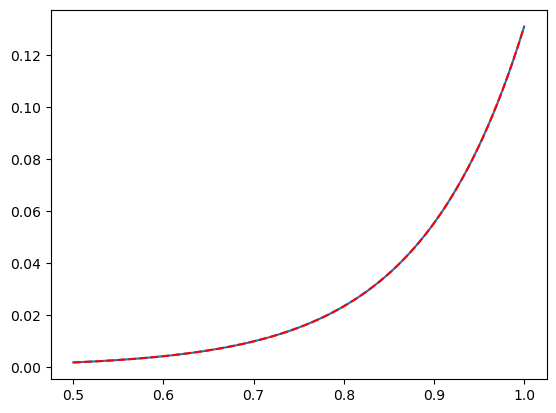

In [20]:
''' How it looks like in circuit_calcs (already imported)
def exp_decay(t, a, b, c):
    return a*np.exp(-t/b)+c
    
def exp_decay_alt(x, a, b, c):
    return np.exp(-a*(x-b)) + c
'''

t = time_array[idx_start:idx_stop] * 1e9  # default to ns
v = voltage_cancel[idx_start:idx_stop] * 1e10
exp_fit_up = exp_alt_model.fit(v, x=t,
                                 a=-8.6, b=1.24, c=0)  # exp_decay_model or exp_alt_model
print(exp_fit_up.fit_report())

plt.plot(t, v)
plt.plot(t, exp_fit_up.best_fit, "r--", label="Exponential fit")

In [21]:
-8.61688464*1e9  # r/l
3.3309848280783963e-05 / -8.61688464e9
-8.61688464e9 * -3e-18

2.5850653919999998e-08

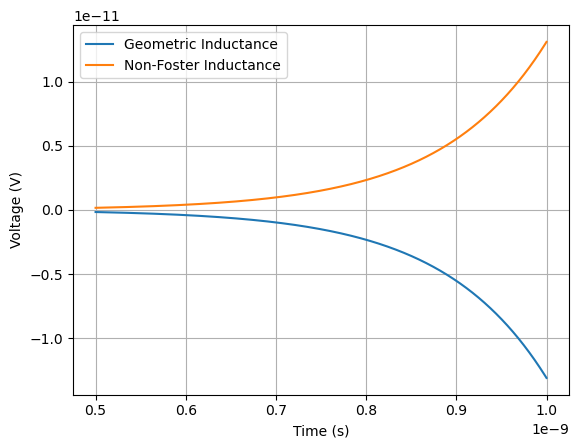

In [22]:
# plt.plot(time_array[idx_start:idx_stop], voltage_input[idx_start:idx_stop], label="Input")  # choose what to plot
# plt.plot(time_array[idx_start:idx_stop], voltage_input[idx_start:idx_stop]*100, label="Input, 100x AMPLIFIED")  # to see structure better
plt.plot(time_array[idx_start:idx_stop], voltage_geometric[idx_start:idx_stop], label="Geometric Inductance")
plt.plot(time_array[idx_start:idx_stop], voltage_cancel[idx_start:idx_stop], label="Non-Foster Inductance")
# plt.plot(time_array[idx_start:idx_stop], voltage_jj[idx_start:idx_stop], label="Across Josephson junction")
# plt.plot(time_array[idx_start:idx_stop], voltage_output[idx_start:idx_stop], label="Output")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid()
plt.legend()
plt.show()

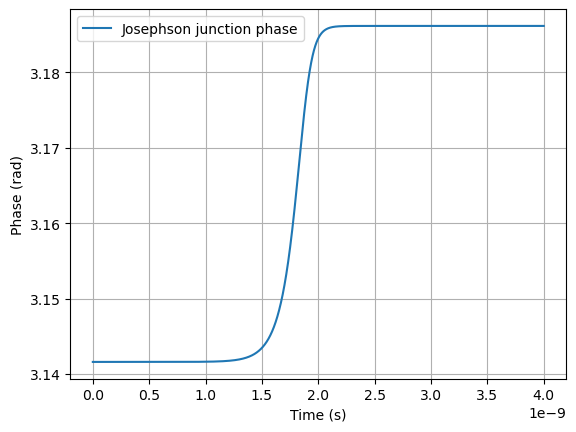

In [23]:
idx_start = 0  # 5000
idx_stop = 40000  # 10000  
phase_jj = cd.data["v(101)"].to_numpy()  # JJ phase
plt.plot(time_array[idx_start:idx_stop], phase_jj[idx_start:idx_stop], label="Josephson junction phase")
plt.xlabel("Time (s)")
plt.ylabel("Phase (rad)")
plt.grid()
plt.legend()
plt.show()

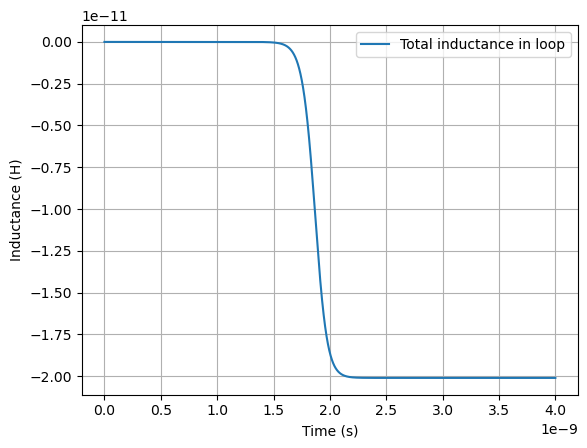

In [24]:
l1, l2, lj, k = 3.292207792207794e-10, 3.1386687839543916e-10, 3.019320903444526e-10, 0.3
lcancel = l1*(1 - k**2 * l2 / (l2 + lj/np.cos(phase_jj)))
plt.plot(time_array[idx_start:idx_stop], lcancel[idx_start:idx_stop] + 4.5e-10, label="Total inductance in loop")
plt.xlabel("Time (s)")
plt.ylabel("Inductance (H)")
plt.grid()
plt.legend()
plt.show()

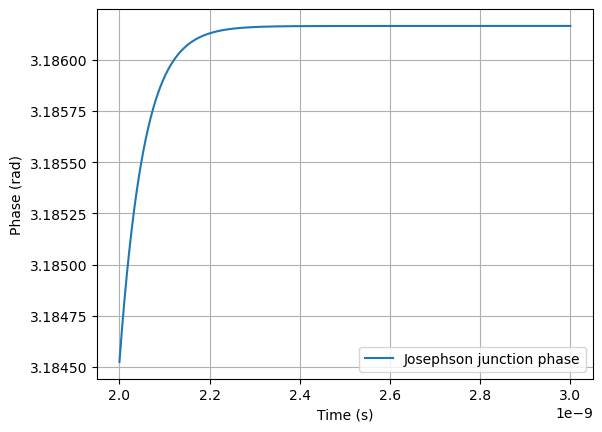

In [25]:
# When it goes down
idx_start = 20000
idx_stop = 30000
phase_jj = cd.data["v(101)"].to_numpy()  # JJ phase
plt.plot(time_array[idx_start:idx_stop], phase_jj[idx_start:idx_stop], label="Josephson junction phase")
plt.xlabel("Time (s)")
plt.ylabel("Phase (rad)")
plt.grid()
plt.legend()
plt.show()

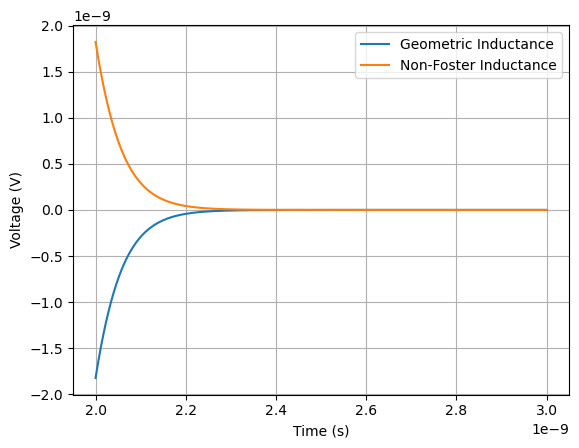

In [26]:
# plt.plot(time_array[idx_start:idx_stop], voltage_input[idx_start:idx_stop], label="Input")  # choose what to plot
# plt.plot(time_array[idx_start:idx_stop], voltage_input[idx_start:idx_stop]*100, label="Input, 100x AMPLIFIED")  # to see structure better
plt.plot(time_array[idx_start:idx_stop], voltage_geometric[idx_start:idx_stop], label="Geometric Inductance")
plt.plot(time_array[idx_start:idx_stop], voltage_cancel[idx_start:idx_stop], label="Non-Foster Inductance")
# plt.plot(time_array[idx_start:idx_stop], voltage_jj[idx_start:idx_stop], label="Across Josephson junction")
# plt.plot(time_array[idx_start:idx_stop], voltage_output[idx_start:idx_stop], label="Output")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid()
plt.legend()
plt.show()

[[Model]]
    Model(exp_decay_alt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 10000
    # variables        = 3
    chi-square         = 9.93962923
    reduced chi-square = 9.9426e-04
    Akaike info crit   = -69132.1065
    Bayesian info crit = -69110.4755
    R-squared          = 0.99988104
[[Variables]]
    a:  18.2997055 +/- 0.00402302 (0.02%) (init = 20.3)
    b:  2.15947612 +/- 3.0385e-05 (0.00%) (init = 2.17)
    c: -0.00914353 +/- 3.5670e-04 (3.90%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9806
    C(b, c) = -0.4042
    C(a, c) = +0.3503


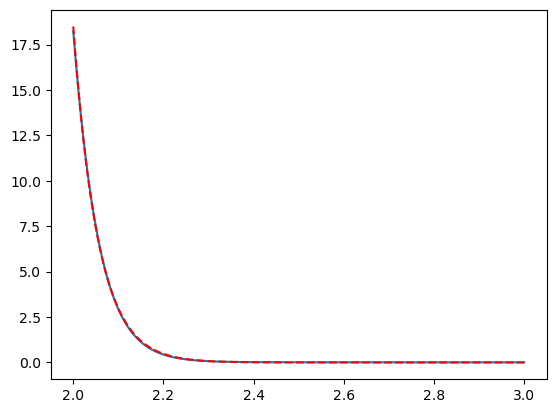

In [27]:
''' How it looks like in circuit_calcs (already imported)
def exp_decay(t, a, b, c):
    return a*np.exp(-t/b)+c
    
def exp_decay_alt(x, a, b, c):
    return np.exp(-a*(x-b)) + c
'''

t = time_array[idx_start:idx_stop] * 1e9
v = voltage_cancel[idx_start:idx_stop] * 1e10
exp_fit_up = exp_alt_model.fit(v, x=t,
                                 a=20.3, b=2.17, c=0)  # exp_decay_model or exp_alt_model
print(exp_fit_up.fit_report())

plt.plot(t, v)
plt.plot(t, exp_fit_up.best_fit, "r--", label="Exponential fit")

In [28]:
18.2997075e9  # r/l
3.3309848280783963e-05 / 18.2997075e9
18.2997075e9 * -2e-11

-0.36599414999999996

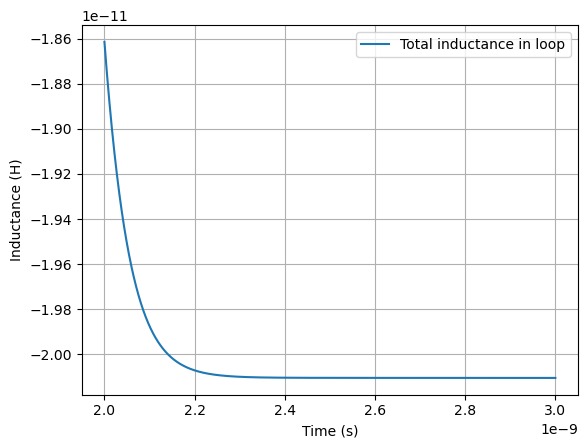

In [29]:
plt.plot(time_array[idx_start:idx_stop], lcancel[idx_start:idx_stop] + 4.5e-10, label="Total inductance in loop")
plt.xlabel("Time (s)")
plt.ylabel("Inductance (H)")
plt.grid()
plt.legend()
plt.show()

In [30]:
# resistor contributions
kout = 0.5773502691896257
l0 = 2.25e-10
omega = 5e7 * 2 * np.pi
z_out = (1/(50 + (1-kout)*l0*omega*1j) + 1/(kout*omega*l0*1j))**-1 + (1-kout)*l0*omega*1j
print(z_out)
print(z_out.imag / omega)

(3.3309848280783963e-05+0.07068578761508174j)
2.249998501056827e-10


In [31]:
# Step function voltage, without junction
cd = CircuitData()
cd.filename = "examples/IndCancel_pulsed_1e-15_nobfe"
cd.read_results()

In [32]:
time_array = cd.data["time"].to_numpy()
voltage_input = cd.data["v(1)-v(0)"].to_numpy()
voltage_output = cd.data["v(0)-v(7)"].to_numpy()
voltage_geometric1 = cd.data["v(0)-v(6)"].to_numpy()
voltage_geometric2 = + cd.data["v(2)-v(1)"].to_numpy()
voltage_cancel = cd.data["v(6)-v(2)"].to_numpy()
voltage_jj = cd.data["v(3)-v(0)"].to_numpy()  # Josephson junction

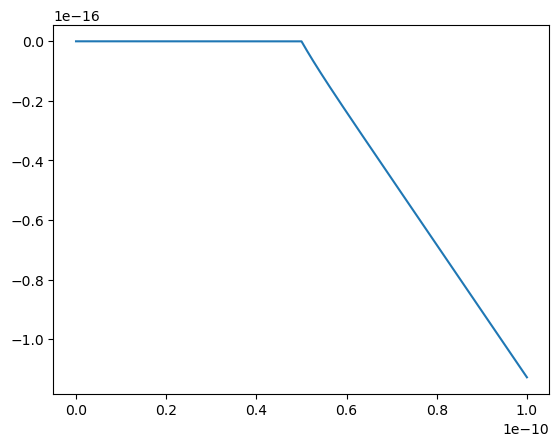

In [33]:
# Current
plt.plot(time_array, cd.data["i(la)"])

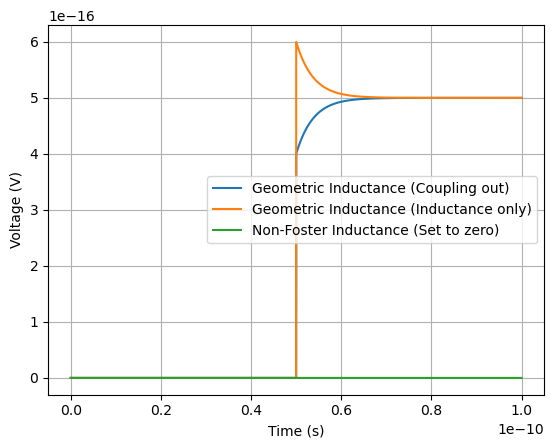

In [34]:
# full thing
plt.plot(time_array, voltage_geometric1, label="Geometric Inductance (Coupling out)")
plt.plot(time_array, voltage_geometric2, label="Geometric Inductance (Inductance only)")
plt.plot(time_array, voltage_cancel, label="Non-Foster Inductance (Set to zero)")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid()
plt.legend()
plt.show()

[[Model]]
    Model(exp_decay_alt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 382
    # data points      = 5000
    # variables        = 3
    chi-square         = 3.9863e-24
    reduced chi-square = 7.9774e-28
    Akaike info crit   = -311975.831
    Bayesian info crit = -311956.279
    R-squared          = 1.00000000
[[Variables]]
    a:  266.666819 +/- 1.2125e-06 (0.00%) (init = 20.3)
    b: -0.00180338 +/- 2.4271e-10 (0.00%) (init = 2.17)
    c:  5.0000e-06 +/- 4.7741e-16 (0.00%) (init = 5e-06)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = +0.9994
    C(a, c) = +0.4201
    C(b, c) = +0.4077


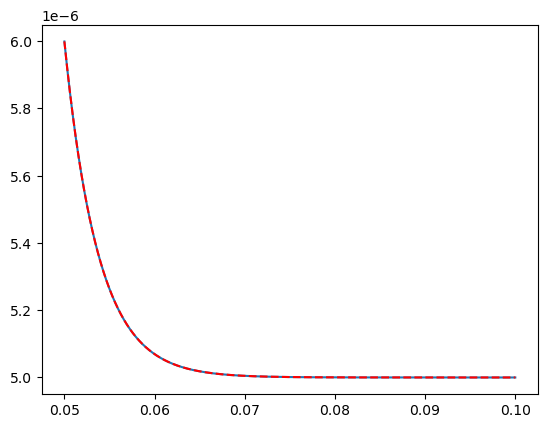

In [35]:
''' How it looks like in circuit_calcs (already imported)
def exp_decay(t, a, b, c):
    return a*np.exp(-t/b)+c
    
def exp_decay_alt(x, a, b, c):
    return np.exp(-a*(x-b)) + c
'''

idx_start = 5001
idx_stop = 10001  # 1 cycle: 2000 points (500 MHz)

t = time_array[idx_start:idx_stop] * 1e9
v = voltage_geometric2[idx_start:idx_stop] * 1e10
exp_fit_up = exp_alt_model.fit(v, x=t,
                                 a=20.3, b=2.17, c=5e-6)  # exp_decay_model or exp_alt_model
print(exp_fit_up.fit_report())

plt.plot(t, v)
plt.plot(t, exp_fit_up.best_fit, "r--", label="Exponential fit")

In [36]:
266.666819e9  # r/l
266.666819e9 * 4.5e-10

120.00006855

In [37]:
# Simple RL circuit, L = 2.25e-10, R = 50
cd = CircuitData()
cd.filename = "examples/IndCancel_pulsed_simple_rl"
cd.read_results()

In [38]:
time_array = cd.data["time"].to_numpy()
voltage_input = cd.data["v(1)-v(0)"].to_numpy()
voltage_output = cd.data["v(0)-v(7)"].to_numpy()
voltage_geometric1 = cd.data["v(0)-v(6)"].to_numpy()
voltage_geometric2 = + cd.data["v(2)-v(1)"].to_numpy()
voltage_cancel = cd.data["v(6)-v(2)"].to_numpy()
voltage_jj = cd.data["v(3)-v(0)"].to_numpy()  # Josephson junction

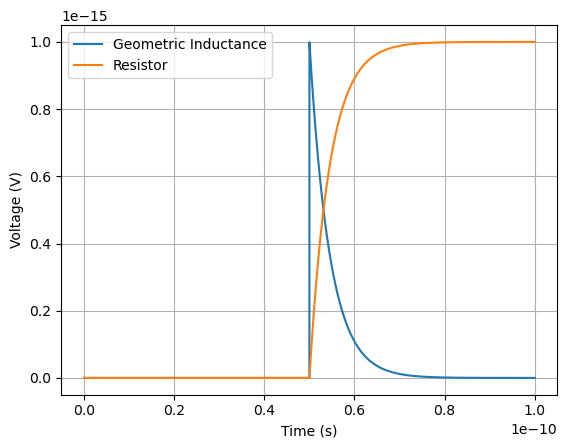

In [39]:
# full thing
plt.plot(time_array, voltage_geometric1, label="Geometric Inductance")
plt.plot(time_array, voltage_geometric2, label="Resistor")
# plt.plot(time_array, voltage_cancel, label="Non-Foster Inductance (Set to zero)")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid()
plt.legend()
plt.show()

[[Model]]
    Model(exp_decay_alt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 3000
    # variables        = 3
    chi-square         = 2.6433e-24
    reduced chi-square = 8.8198e-28
    Akaike info crit   = -186883.147
    Bayesian info crit = -186865.128
    R-squared          = 1.00000000
[[Variables]]
    a:  222.222319 +/- 1.0600e-06 (0.00%) (init = 222.22)
    b: -0.00180339 +/- 3.0118e-10 (0.00%) (init = 0)
    c: -3.8089e-15 +/- 8.4526e-16 (22.19%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = +0.9995
    C(a, c) = +0.6424
    C(b, c) = +0.6284


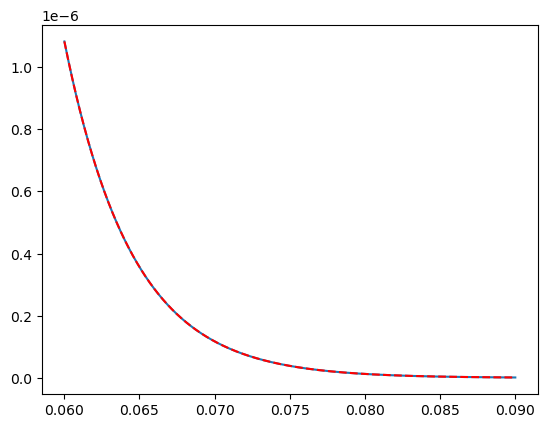

In [40]:
''' How it looks like in circuit_calcs (already imported)
def exp_decay(t, a, b, c):
    return a*np.exp(-t/b)+c
    
def exp_decay_alt(x, a, b, c):
    return np.exp(-a*(x-b)) + c
'''

idx_start = 6001
idx_stop = 9001  # 1 cycle: 2000 points (500 MHz)

t = time_array[idx_start:idx_stop] * 1e9
v = voltage_geometric1[idx_start:idx_stop] * 1e10
exp_fit_up = exp_alt_model.fit(v, x=t,
                                 a=222.22, b=0, c=0)  # exp_decay_model or exp_alt_model
print(exp_fit_up.fit_report())

plt.plot(t, v)
plt.plot(t, exp_fit_up.best_fit, "r--", label="Exponential fit")

In [41]:
222.222319e9  # r/l
222.222319e9 * 2.25e-10

50.000021775

In [42]:
50 / 222.222319e9

2.2499990201254268e-10